In [1]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pylab as plt

In [116]:
np.set_printoptions(threshold=np.inf)

In [117]:
# Structure of data

'''
BraTS
|- BraTS2021_Training_Data
    |- BraTS2021_xxxxx
        |- BraTS2021_xxxxx_flair.nii.gz
        |- BraTS2021_xxxxx_t1.nii.gz
        |- BraTS2021_xxxxx_t1ce.nii.gz
        |- BraTS2021_xxxxx_t2.nii.gz
        |- BraTS2021_xxxxx_seg.nii.gz
'''

'\nBraTS\n|- BraTS2021_Training_Data\n    |- BraTS2021_xxxxx\n        |- BraTS2021_xxxxx_flair.nii.gz\n        |- BraTS2021_xxxxx_t1.nii.gz\n        |- BraTS2021_xxxxx_t1ce.nii.gz\n        |- BraTS2021_xxxxx_t2.nii.gz\n        |- BraTS2021_xxxxx_seg.nii.gz\n'

# List all folders

In [118]:
main_path = './BraTS/BraTS2021_Training_Data/'
scans = os.listdir(main_path)
if '.DS_Store' in scans:
  scans.remove('.DS_Store')

# Some images

In [352]:
np.random.seed(10)
rand_scan = np.random.choice(scans, 1)[0]

In [353]:
import sklearn
from sklearn.preprocessing import MinMaxScaler as scaler

img = nib.load(main_path + rand_scan + "/" + rand_scan + '_t1ce.nii.gz').get_fdata()
print(img.shape, np.max(img), np.min(img))

(240, 240, 155) 1243.006591796875 0.0


In [354]:
rand_scan
print(rand_scan)
print(img.shape)
#x = img.reshape(-1, img.shape[-1])
#print(x.shape)
#img=scaler.fit_transform(x).reshape(img.shape)



BraTS2021_00811
(240, 240, 155)


(240, 240, 155)


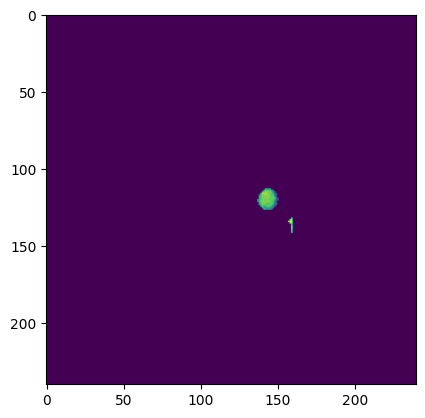

In [355]:
new_img = img[ :,:,:]
print(new_img.shape)

plt.imshow(new_img[:,:,2])
plt.show()

(240, 240, 155)


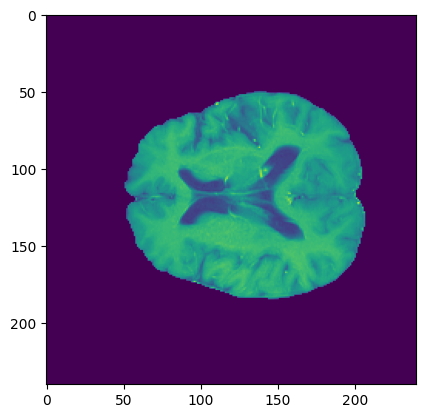

In [356]:
new_img = img[ :,:,:]
print(new_img.shape)

plt.imshow(new_img[:,:,77])
plt.show()

(240, 240, 155)


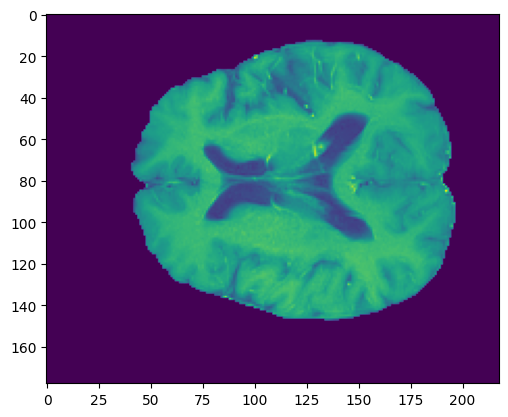

In [357]:

new_img = img[ :,:,:]
print(new_img.shape)

plt.imshow(new_img[37:215,10:228,77])
plt.show()

(240, 240, 155)


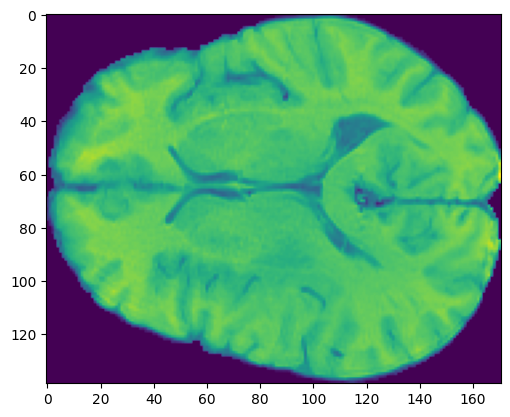

In [322]:
new_img = img[ :,:,:]
print(new_img.shape)

plt.imshow(new_img[53:192,36:207,77])
plt.show()


Find the boundaries of the largest brain which can be used to crop all the scans and reduce computational time for the models

In [3]:
curr_start_of_image_x, curr_start_of_image_y = 240, 240
curr_end_of_image_x, curr_end_of_image_y = 0,0
for num, scan in enumerate(scans):
    img = nib.load(main_path + scan + "/" + scan + '_' + 't1' + '.nii.gz').get_fdata()
    for z in range(0, 155):
        #BOTTOM TO TOP
        start_of_image_y=[]
        end_of_image_y = []
        for i in range(0,240):
            counter = 0 
            for j in range(0,240):
                if img[j,i,z] == 0:
                    counter = counter + 1
            if counter != 240:
                start_of_image_y.append(i)

        #LEFT TO RIGHT
        start_of_image_x=[]
        end_of_image_x = []
        for i in range(0,240):
            counter = 0 
            for j in range(0,240):
                if img[i,j,z] == 0:
                    counter = counter + 1
            if counter != 240:
                start_of_image_x.append(i)
        if len(start_of_image_y) > 0:
            end_of_image_y = start_of_image_y[len(start_of_image_y)-1]
            end_of_image_x = start_of_image_x[len(start_of_image_x)-1]
            start_of_image_x = start_of_image_x[0]
            start_of_image_y = start_of_image_y[0]

            if start_of_image_x < curr_start_of_image_x:
                curr_start_of_image_x = start_of_image_x
            if start_of_image_y < curr_start_of_image_y:
                curr_start_of_image_y = start_of_image_y 
            if end_of_image_y > curr_end_of_image_y:
                curr_end_of_image_y = end_of_image_y
            if end_of_image_x > curr_end_of_image_x:
                curr_end_of_image_x = end_of_image_
        
    print("SCAN NUMBER", num, "OUT OF", len(scans))
print(curr_start_of_image_x, curr_end_of_image_x)
print(curr_start_of_image_y, curr_end_of_image_y)

37 215
10 228


In [ ]:
max_intensity = [-10**9,-10**9,-10**9,-10**9,-10**9]
min_intensity = [10**9,10**9,10**9,10**9,10**9]
scan_types = ['t1', 't1ce', 'flair', 't2', 'seg']
neg_list_t1=[]
neg_list_t1ce=[]
neg_list_flair=[]
neg_list_t2=[]
neg_list_seg=[]


for i, scan in enumerate(scans):
    for j, scan_type in enumerate(scan_types):
        img = nib.load(main_path + scan + "/" + scan + '_' + scan_type + '.nii.gz').get_fdata()
        tmp_min = np.min(img)
        tmp_max = np.max(img)
        if j == 0 and tmp_min<0:
           neg_list_t1.append(scan)
        if j == 1 and tmp_min<0:
            neg_list_t1ce.append(scan)
        if j == 2 and tmp_min<0:
            neg_list_flair.append(scan)
        if j == 3 and tmp_min<0:
            neg_list_t2.append(scan)
        if j == 4 and tmp_min<0:
            neg_list_seg.append(scan)

        if i == 0:
            min_intensity[j] = tmp_min
            max_intensity[j] = tmp_max
        else:
            if tmp_min < min_intensity[j]:
                min_intensity[j] = tmp_min
            if tmp_max > max_intensity[j]:
                max_intensity[j] = tmp_max
    print("SCAN NUMBER", i, "OUT OF", len(scans), '.', min_intensity, max_intensity)

In [151]:
print(neg_list_t1)
print(neg_list_t1ce)
print(neg_list_flair)
print(neg_list_t2)
print(neg_list_seg)

['BraTS2021_01655', 'BraTS2021_01332', 'BraTS2021_00446', 'BraTS2021_01551', ['BraTS2021_01021', 'BraTS2021_01551']]
['BraTS2021_01021', 'BraTS2021_01551']
['BraTS2021_01548', 'BraTS2021_00584', 'BraTS2021_00446', 'BraTS2021_01551']
['BraTS2021_01548', 'BraTS2021_00540', 'BraTS2021_00584', 'BraTS2021_01655', 'BraTS2021_01021', 'BraTS2021_01644', 'BraTS2021_00479', 'BraTS2021_01551']
[]
